# 线性回归与逻辑回归（Linear Regression & Logistic Regression ）

* 线性回归 是 回归
* 逻辑回归 是 分类

## Linear Gression---

* Hypothesis Function

    $h_\theta(x) = \Theta^T x $


* Cost Function

    $Cost[ h_\theta(x) , y] = [h_\theta(x) - y ]^2$


* Loss Function

    $J(\Theta) = \frac{1}{2m}\sum_{i=1}^mCost[h_\theta(x^i),y^i]$


* Regularization 

    $J(\Theta) = \frac{1}{2m}\sum_{i=1}^mCost[h_\theta(x^i),y^i] + \frac{\lambda}{2m}\sum_{i=1}^{n}\Theta_j^2$

    $\Theta_j := \Theta_j - \alpha\frac{\delta}{\delta\Theta_j}J(\Theta)$


* Gradient Descent

    对J进行迭代，收敛到一定程度，得到Θ，为最优解

    $GD(X,Y,\Theta,\alpha , n_{repeat-number},*\lambda)$

    J_history 记录每次迭代的损失函数值

    然后模型训练后得到 参数Θ ，以及所有的对应参数的损失函数值

    看损失函数值是否收敛


* Predict
    将得到的参数，带入到假设函数中，求预测值


## 手推线性回归代码--

In [1]:
# 加载相关工具库
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 读入数据
data = np.loadtxt("linear_regression_data1.txt",delimiter = ",")
data[:5]

array([[ 6.1101, 17.592 ],
       [ 5.5277,  9.1302],
       [ 8.5186, 13.662 ],
       [ 7.0032, 11.854 ],
       [ 5.8598,  6.8233]])

In [3]:
# 数据处理
x = np.c_[np.ones(data.shape[0]),data[:,0]]
y = np.c_[data[:,1]]

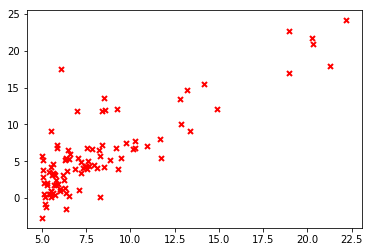

In [4]:
# 查看数据分布情况
plt.scatter(x[:,1],y,s = 25 ,c = "r" , marker = "x" ,linewidth = 2)

In [5]:
# 构建假设函数
def hypothesis(x,theta = [[0],[0]]):
    
    h = x.dot(theta)
    
    return h

In [6]:
# 构建损失函数

def lossfunction(x,y,theta = [[0],[0]]):
    
    m = y.size
    
    h = hypothesis(x,theta)
    
    J = 1 / (2 * m) * np.sum(np.square(h -y))
    
    return J

In [7]:
# 查看初始状态的损失
lossfunction(x,y)
32.072733877455676

32.072733877455676

In [8]:
# 构建迭代梯度

def gradientdescent(x,y,theta=[[0],[0]],alpha = 0.01 ,num_iters = 2000):
    
    m = y.size
    
    J_history = np.zeros(num_iters)
    
    for i in np.arange(num_iters):
        h = x.dot(theta)
        theta = theta - alpha*(1.0/m)*(x.T.dot(h-y))
        
        J_history[i] = lossfunction(x,y,theta)
    
    return (theta,J_history)

theta: [[-3.78806857]
 [ 1.18221277]]


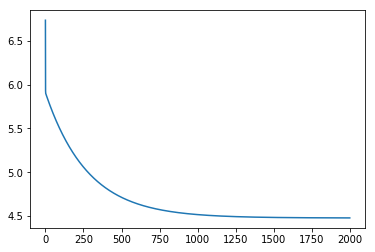

In [9]:
# 由梯度下降得到的参数，以及最小损失值
theta,J =gradientdescent(x,y)
print("theta:",theta);
plt.plot(J)

In [10]:
# 做预测，找一个不奇葩的数据，比如data[5]

x = data[5]
hypothesis(x,theta)

array([-17.703219])

## Logistics Gression---

* Hypothesis Function

    $g(z) = \frac{1}{1+e^{-x}}$

    $h_\theta(x) = g(\Theta^T x)$

* Cost Function

    $Cost[ h_\theta(x) , y] = \begin{cases}-log(h_\theta(x))\quad y=1\\\quad \\-log(1 - h_\theta(x))\quad y=0\\\end{cases}$

* Loss Function

    $J(\Theta) = -\frac{1}{m}\sum_{i=1}^m[y^ilog(h_\theta(x^i)) + (1 - y^i)log(1-h_\theta(x^i))]$

* Regularization 

    $J(\Theta) = -\frac{1}{m}\sum_{i=1}^m[y^ilog(h_\theta(x^i)) + (1 - y^i)log(1-h_\theta(x^i))] + \frac{\lambda}{2m}\sum_{i=1}^{n}\Theta_j^2$

    $\Theta_j := \Theta_j - \alpha\frac{\delta}{\delta\Theta_j}J(\Theta)$

* Gradient Descent
    对J进行迭代，收敛到一定程度，得到Θ，为最优解

    $GD(X,Y,\Theta,\alpha , n_{repeat-number} ,*\lambda)$

    J_history 记录每次迭代的损失函数值

    然后模型训练后得到 参数Θ ，以及所有的对应参数的损失函数值

    看损失函数值是否收敛

* Predict
    将得到的参数，带入到假设函数中，得到假设函数值
    \> 0.5 是正样本概率大于0.5 判断为正样本 
    < 0.5 是正样本概率小于0.5 判断为负样本

* Multi Classification
    * one vs one
    构建 n*(n-1)/2个分类器
    * one vs rest
    构建n个分类器

## 手推逻辑回归代码--

In [34]:
# 加载相关库
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# 加载数据
data = np.loadtxt("logistic_regression_data1.txt",delimiter = ",")

In [13]:
# 查看数据
data[:5]

array([[34.62365962, 78.02469282,  0.        ],
       [30.28671077, 43.89499752,  0.        ],
       [35.84740877, 72.90219803,  0.        ],
       [60.18259939, 86.3085521 ,  1.        ],
       [79.03273605, 75.34437644,  1.        ]])

In [14]:
# 处理数据
x = np.c_[np.ones(data.shape[0]),data[:,:-1]]

y = np.c_[data[:,-1]]

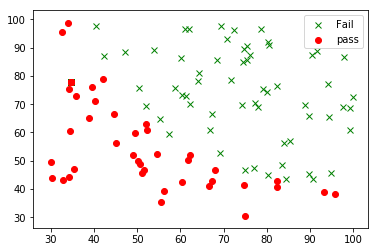

In [16]:
plt.scatter(x[np.where(y == 1),1],x[np.where(y == 1),2],marker = "x" , c = "g", linewidth= "1")
plt.scatter(x[np.where(y == 0),1],x[np.where(y == 0),2],marker = "o" , c = "r", linewidth= "1")
plt.legend(["Fail","pass"])
plt.show()

In [119]:
# 构建sigmoid函数
def g(z):
    return 1.0/(1.0 + np.exp(-z))

In [120]:
# 构建损失函数
def loss(theta,x,y):
    m = y.size
    h = g(x.dot(theta))
    J = -1.0 / m * (np.log(h).T.dot(y) + np.log(1-h).T.dot(1-y))
    
    if np.isnan(J[0]):
        return(np.inf)
    return J[0]

In [127]:
def gradient(theta, X, y):
    m = y.size
    h = g(X.dot(theta.reshape(-1,1)))
    
    grad =(1.0/m)*X.T.dot(h-y)

    return(grad.flatten())

In [128]:
theta = np.zeros(x.shape[1])
cost = loss(theta, x, y)
grad = gradient(theta, x, y)
print('Cost: \n', cost)
print('Grad: \n', grad)

Cost: 
 0.6931471805599452
Grad: 
 [ -0.1        -12.00921659 -11.26284221]
